# 1- You need to install ChAMP package which depends on minifi and other methylation package 
https://www.bioconductor.org/packages/devel/bioc/vignettes/ChAMP/inst/doc/ChAMP.html

In [15]:
source("https://bioconductor.org/biocLite.R")
biocLite("ChAMP")

Bioconductor version 3.6 (BiocInstaller 1.28.0), ?biocLite for help
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.6 (BiocInstaller 1.28.0), R 3.4.3 (2017-11-30).
Installing package(s) ‘ChAMP’
Warning message in install.packages(pkgs = doing, lib = lib, ...):
“installation of package ‘ChAMP’ had non-zero exit status”installation path not writeable, unable to update packages: rJava, codetools,
  lattice, MASS, Matrix, mgcv, nlme, rpart
Old packages: 'mapproj', 'plm', 'RWeka', 'RWekajars'


# OR

In [ ]:
source("http://bioconductor.org/biocLite.R")
biocLite(c("minfi","ChAMPdata","Illumina450ProbeVariants.db","sva","IlluminaHumanMethylation450kmanifest",
           "limma","RPMM","DNAcopy","preprocessCore","impute","marray","wateRmelon","goseq","plyr","GenomicRanges","RefFreeEWAS","qvalue","isva","doParallel","bumphunter","quadprog","shiny","shinythemes","plotly","RColorBrewer","DMRcate","dendextend",
           "IlluminaHumanMethylationEPICmanifest","FEM","matrixStats","missMethyl","combinat"))

# 2-You can load the library 

In [2]:
library("ChAMP")

In [3]:
library("doParallel")
detectCores()

[1] 56

# 2- Check sample annotation format
#### You have to import sample annotation files for your samples in the below format:

In [9]:
sample_annotation=read.csv(file="6_chips_EPIC/sample_annotation_EPIC_R01.csv",
                          colClasses=c('factor', 'factor', 'factor','factor','numeric','factor','factor','factor',
                                      'numeric','factor','factor','factor'),check.names=F)
head(sample_annotation)
table(sample_annotation$Parity)
table(sample_annotation$Delivery_route)
table(sample_annotation$Parity)
table(sample_annotation$Sample_Group)
table(sample_annotation$Alcohol)

Sample ID,Sentrix_ID,Sentrix_Position,Sample_Group,Maternal_Age,Maternal_Ethnicity,Gravidity,Parity,BMI,Delivery_route,Smoking,Alcohol
PL-22123,2.02E+11,R01C01,control,28,Caucasian,6,2,37.2,Vaginal,No,No
PL-21948,2.02E+11,R02C01,case,27,Caucasian,0,0,51.0,Vaginal,No,Yes
PL-21635,2.02E+11,R03C01,case,30,Caucasian,0,0,25.0,Vaginal,No,Yes
PL-20685,2.02E+11,R04C01,case,33,Caucasian,0,0,38.7,Vaginal,No,Yes
PL-16931,2.02E+11,R05C01,control,34,Caucasian,1,1,29.3,Vaginal,No,No
PL-16714,2.02E+11,R06C01,case,25,Caucasian,0,0,30.0,Vaginal,No,Yes



 0  1  2  3  5 
27 11  7  2  1 


Cesarean  vaginal  Vaginal 
      13        1       34 


 0  1  2  3  5 
27 11  7  2  1 


   case control 
     24      24 


 No Yes 
 40   8 

# 3-Load the idat files AND filtration  
# Put your idats files+ sample_annotation in specific directory 
# You have to select either to load Beta or M-values. M used for small samples
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3012676/

<img src="beta.JPG">
<img src="m.JPG">

# There are five different filtration types 
## First filter is for probes with detection p-value (< 0.01). This utilises detection p-value stored in .idat file. For each probe, if it’s p value is less then 0.01, it would be considered as failed probe. A failedSamples result will be printed to the screen, showing the fraction of failed probes per sample. Example: remove samples if they may have 70% or even 80% of failed probes.
## Second, filter out probes with ( less than 3 beads in at least 5% of samples per probe)
## Third, filter out all non-CpG probes contained in the dataset
## Fourth, filter all SNP-related probes 
## Fifth, filter all multi-hit probes
## Sixth, filter out all probes located in chromosome X and Y

In [14]:
# myLoad_M_Texas <- champ.load(directory="2_chips_EPIC_Texas",arraytype="EPIC",filterBeads=T,methValue="M")# 2 Chips from Texas 
# myLoad_B_Texas <- champ.load(directory="2_chips_EPIC_Texas",arraytype="EPIC",filterBeads=T,methValue="B")# 2 Chips from Texas

# myLoad_M_2 <- champ.load(directory="2_chips_EPIC",arraytype="EPIC",filterBeads=T,methValue="M")# The first 2 chips from Jashwa 
# myLoad_B_2 <- champ.load(directory="2_chips_EPIC",arraytype="EPIC",filterBeads=T,methValue="B")# The first 2 chips from Jashwa

myLoad_B <- champ.load(directory="6_chips_EPIC",arraytype="EPIC",filterBeads=T,methValue="B")# All six chips beta values
#myLoad_M <- champ.load(directory="6_chips_EPIC",arraytype="EPIC",filterBeads=T,methValue="M")# All six chips M values

# myLoad_M_2_oth <- champ.load(directory="2_chips_EPIC_other2",arraytype="EPIC",filterBeads=T,methValue="M")# The OTHER 2 chips run with last 4 chips 
# myLoad_B_2_oth <- champ.load(directory="2_chips_EPIC_other2",arraytype="EPIC",filterBeads=T,methValue="B")# The OTHER 2 chips run with last 4 chips

#             champ.load(directory = getwd(),
#                             methValue="B",
#                             filterDetP=TRUE,
#                             detSamplecut=0.1, #sample cut
#                             detPcut=0.01,     #probs cut
#                             removeDetP = 0,
#                             filterBeads=TRUE,
#                             beadCutoff=0.05,  #beads
#                             filterNoCG=TRUE,
#                             filterSNPs=TRUE,
#                             population=NULL,  #for snp filtration 
#                             filterMultiHit=TRUE,
#                             filterXY=TRUE,
#                             arraytype="450K")



[===========================]
[<<<< ChAMP.LOAD START >>>>>]
-----------------------------
Loading data from 6_chips_EPIC
[read.metharray.sheet] Found the following CSV files:



[1] "6_chips_EPIC/sample_annotation_EPIC_R01.csv"


<< Read DataSet Success. >>

The fraction of failed positions per sample
 
            (You may need to delete samples with high proportion of failed probes
): 


         Failed CpG Fraction.
PL-22123         0.0007297155
PL-21948         0.0002921171
PL-21635         0.0006731394
PL-20685         0.0002782618
PL-16931         0.0003256009
PL-16714         0.0002147580
PL-16372         0.0003660123
PL-15405         0.0006581295
PL-15187         0.0006431195
PL-15051         0.0006234911
PL-13994         0.0003406109
PL-13815         0.0006107903
PL-13187         0.0002898079
PL-12010         0.0003844862
PL-11941         0.0003602393
PL-8930          0.0006558202
PL-8134          0.0004248976
PL-1559          0.0003463839
PL-794           0.0003879500
PL-552           0.0006535110
PL-1018          0.0006673664
PL-838           0.0007516531
PL-1448          0.0003371470
PL-1530          0.0003764039
PL-1558          0.0003313740
PL-5476          0.0005923165
PL-2108          0.0004364437
PL-4829          0.0006639025
PL-5717          0.0003856408
PL-5110          0.0005345859
PL-7317          0.0002932717
PL-1623          0.0004860921
PL-923    

Filtering probes with a detection p-value above 0.01 in one or more samples has removed 7764 probes from the analysis. If a large number of probes have been removed, ChAMP suggests you to identify potentially bad samples.
<< Filter DetP Done. >>

Filtering probes with a beadcount <3 in at least 5% of samples, has removed 32504 from the analysis.
<< Filter Beads Done. >>

Filtering non-cg probes, has removed 2815 from the analysis.
<< Filter NoCG Done. >>

Using general EPIC SNP list for filtering.
Filtering probes with SNPs as identified in Zhou's Nucleic Acids Research Paper, 2016, has removed 77343 from the analysis.
<< Filter SNP Done. >>

Filtering probes that align to multiple locations as identified in Nordlund et al, has removed 48 from the analysis.
<< Filter MultiHit Done. >>

Filtering probes on the X or Y chromosome has removed 16928 from the analysis.
<< Filter XY chromosome Done. >>

[Beta value is selected as output.]

Zeros in your dataset have been replaced with smalles

In [15]:
myLoad_B$pd

,Sample.ID,Sample_Group,Maternal_Age,Maternal_Ethnicity,Gravidity,Parity,BMI,Delivery_route,Smoking,Alcohol,Array,Slide,Basename,filenames
PL-22123,PL-22123,control,28,Caucasian,6,2,37.2,Vaginal,No,No,R01C01,201516280050,6_chips_EPIC/idat/201516280050_R01C01,6_chips_EPIC/idat/201516280050_R01C01
PL-21948,PL-21948,case,27,Caucasian,0,0,51.0,Vaginal,No,Yes,R02C01,201516280050,6_chips_EPIC/idat/201516280050_R02C01,6_chips_EPIC/idat/201516280050_R02C01
PL-21635,PL-21635,case,30,Caucasian,0,0,25.0,Vaginal,No,Yes,R03C01,201516280050,6_chips_EPIC/idat/201516280050_R03C01,6_chips_EPIC/idat/201516280050_R03C01
PL-20685,PL-20685,case,33,Caucasian,0,0,38.7,Vaginal,No,Yes,R04C01,201516280050,6_chips_EPIC/idat/201516280050_R04C01,6_chips_EPIC/idat/201516280050_R04C01
PL-16931,PL-16931,control,34,Caucasian,1,1,29.3,Vaginal,No,No,R05C01,201516280050,6_chips_EPIC/idat/201516280050_R05C01,6_chips_EPIC/idat/201516280050_R05C01
PL-16714,PL-16714,case,25,Caucasian,0,0,30.0,Vaginal,No,Yes,R06C01,201516280050,6_chips_EPIC/idat/201516280050_R06C01,6_chips_EPIC/idat/201516280050_R06C01
PL-16372,PL-16372,case,28,Caucasian,0,0,43.0,Cesarean,No,Yes,R07C01,201516280050,6_chips_EPIC/idat/201516280050_R07C01,6_chips_EPIC/idat/201516280050_R07C01
PL-15405,PL-15405,case,33,Caucasian,0,0,17.7,Vaginal,No,Yes,R08C01,201516280050,6_chips_EPIC/idat/201516280050_R08C01,6_chips_EPIC/idat/201516280050_R08C01
PL-15187,PL-15187,control,34,Caucasian,4,3,32.2,Vaginal,No,No,R01C01,201516280051,6_chips_EPIC/idat/201516280051_R01C01,6_chips_EPIC/idat/201516280051_R01C01
PL-15051,PL-15051,control,38,Caucasian,2,1,36.6,Cesarean,No,No,R02C01,201516280051,6_chips_EPIC/idat/201516280051_R02C01,6_chips_EPIC/idat/201516280051_R02C01


# We have 728689 probs and 48 samples 

In [16]:
dim(myLoad_B$beta)
head(myLoad_B$beta)

[1] 728689     48

,PL-22123,PL-21948,PL-21635,PL-20685,PL-16931,PL-16714,PL-16372,PL-15405,PL-15187,PL-15051,⋯,PL-2217,PL-2432,PL-2580,PL-2644,PL-2913,PL-3395,PL-3752,PL-4313,PL-5314,PL-7631
cg18478105,0.01692729,0.01464077,0.01910360,0.01858479,0.01639800,0.007349986,0.01433637,0.009871405,0.01499014,0.02265347,⋯,0.02433628,0.009355367,0.01856552,0.01014440,0.02117471,0.01842594,0.01126141,0.007204611,0.02036648,0.01947084
cg14361672,0.34873035,0.32429659,0.48362735,0.44482917,0.41382869,0.515873831,0.28960786,0.496992627,0.41279710,0.46234588,⋯,0.36582177,0.409201543,0.41701597,0.26382587,0.35903350,0.34425687,0.35041113,0.369772015,0.37680270,0.39925373
cg01763666,0.89897003,0.90545691,0.90440188,0.90245227,0.91725811,0.905234580,0.93020274,0.901834519,0.91679619,0.89345778,⋯,0.86852756,0.895512391,0.89090909,0.91078562,0.91179377,0.89310987,0.90549591,0.911156555,0.90461627,0.90289707
cg02115394,0.05802167,0.05254895,0.05432629,0.06728251,0.05838790,0.067085625,0.05492057,0.056221841,0.04974901,0.02665979,⋯,0.05272182,0.058342866,0.06839705,0.06005524,0.07819939,0.06016564,0.06720725,0.058118498,0.06879538,0.05343884
cg26724186,0.93039266,0.92928507,0.93277261,0.92763339,0.91519811,0.941192501,0.92859889,0.938807649,0.94123421,0.91688411,⋯,0.92885470,0.941454328,0.92468028,0.96465333,0.94912453,0.94332855,0.91160974,0.929237585,0.93888566,0.91582127
cg24133276,0.03487502,0.02245438,0.02354089,0.03441590,0.02440055,0.018551552,0.02320039,0.015698509,0.02370589,0.02272118,⋯,0.04774416,0.039184249,0.05618964,0.03224522,0.03729480,0.04032805,0.03023256,0.028587963,0.03393203,0.02927400


# 4-Quality control 

[===========================]
[<<<<< ChAMP.QC START >>>>>>]
-----------------------------
champ.QC Results will be saved in ./CHAMP_QCimages/
[QC plots will be proceed with 728689 probes and 48 samples.]

<< Prepare Data Over. >>
<< plot mdsPlot Done. >>

<< Plot densityPlot Done. >>

[<<<<<< ChAMP.QC END >>>>>>>]
[===========================]
[You may want to process champ.norm() next.]



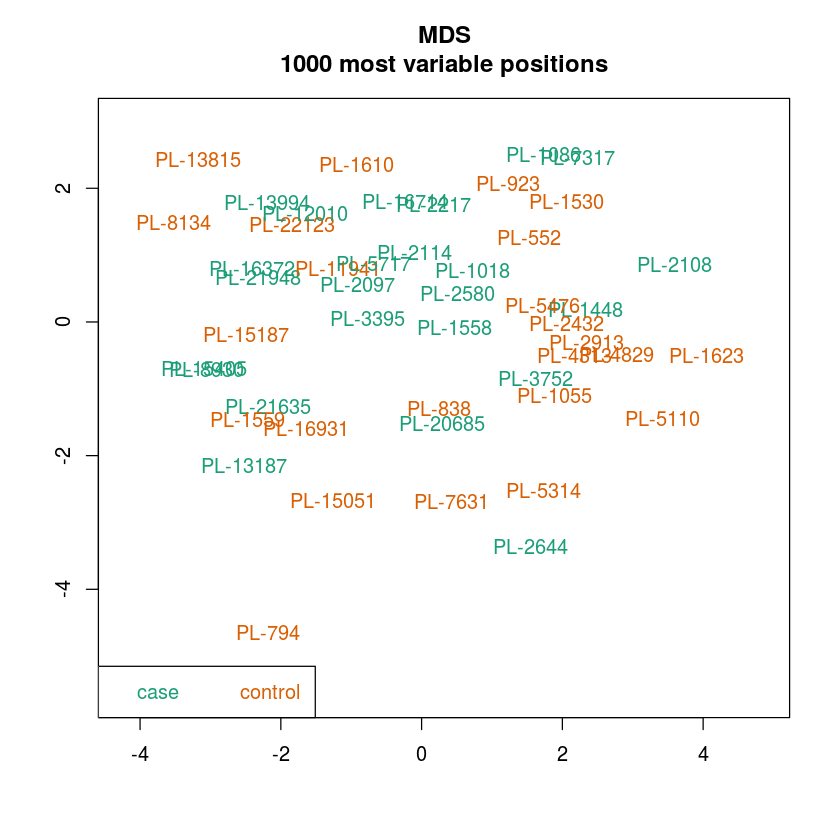

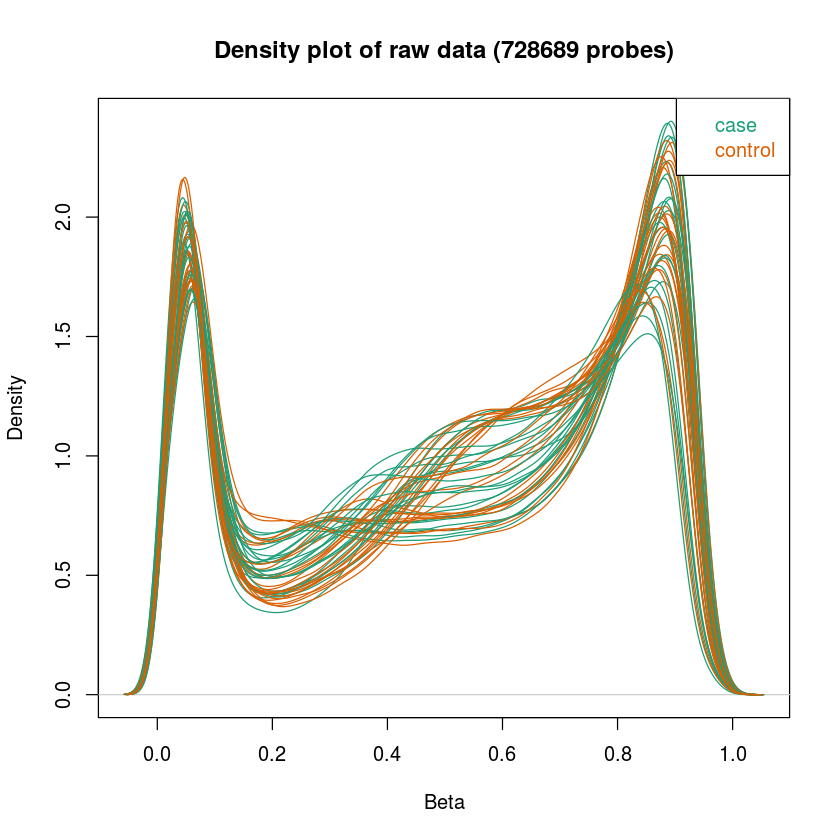

In [20]:
champ.QC(beta = myLoad_B$beta, 
                  pheno=myLoad_B$pd$Sample_Group,
                  mdsPlot=TRUE,
                  densityPlot=T,
                  dendrogram=F,
                  PDFplot=TRUE,
                  Rplot=TRUE,
                  Feature.sel="None",
                  resultsDir="./CHAMP_QCimages/") 


#### Euclidean distance is calculated between samples using the numPositions most variable CpG positions. These distances are then projected into a 2-d plane using classical multidimensional scaling transformation.

In [23]:
library(RColorBrewer)

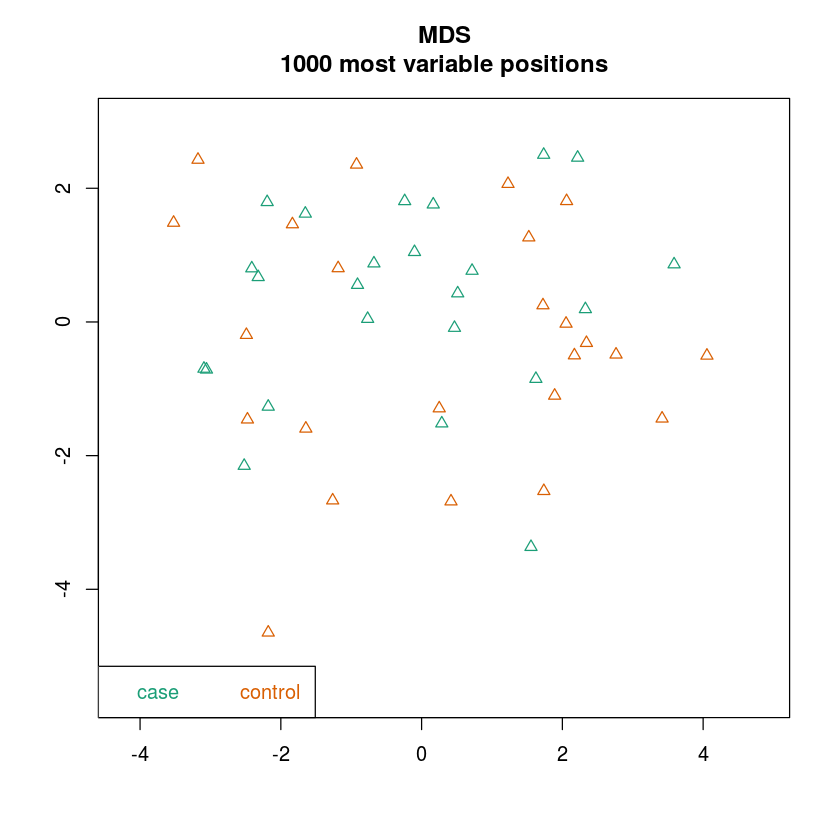

In [24]:
numPositions=1000
b <- myLoad_B$beta
#b <- myNorm
o <- order(-matrixStats::rowVars(b))[1:numPositions]
    d <- dist(t(b[o, ]),method = "euclidean")
    fit <- cmdscale(d)
sampGroups <- as.factor(myLoad_B$pd$Sample_Group)
numGroups <- length(levels(sampGroups))
legendNCol <- numGroups
xlim <- range(fit[, 1]) * 1.2
ylim <- range(fit[, 2]) * 1.2
pal = brewer.pal(8, "Dark2")
col <- pal[sampGroups]
main <- sprintf("MDS\n%d most variable positions", 
                numPositions)
legendPos="bottomleft"
plot(fit[, 1], fit[, 2], col = col, pch = 2, xlim = xlim, 
            ylim = ylim, xlab = "", ylab = "", main = main)
legend(legendPos, legend = levels(sampGroups), ncol = legendNCol, 
            text.col = pal[1:numGroups])

# PCA plot

In [25]:
#prepare the data
bb=cbind(t(b),as.factor(myLoad_B$pd$Sample_Group))
colnames(bb)[ncol(bb)]="label"
bb=data.frame(bb)
bb$label=as.factor(bb$label)
levels(bb$label)=c("control","case")

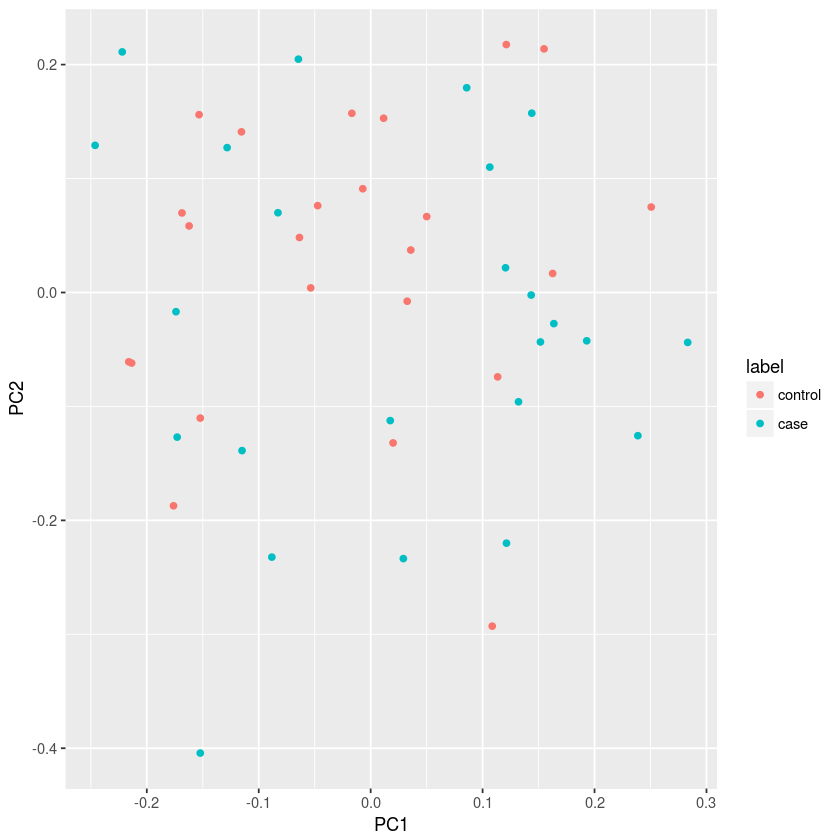

In [28]:
#PCA for only 1000 cpgs
library(ggplot2)
library(ggfortify)
bbb=bb[,-ncol(bb)]
autoplot(prcomp(bbb[,o]),colour = 'label',data=bb)

# t-SNE 

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


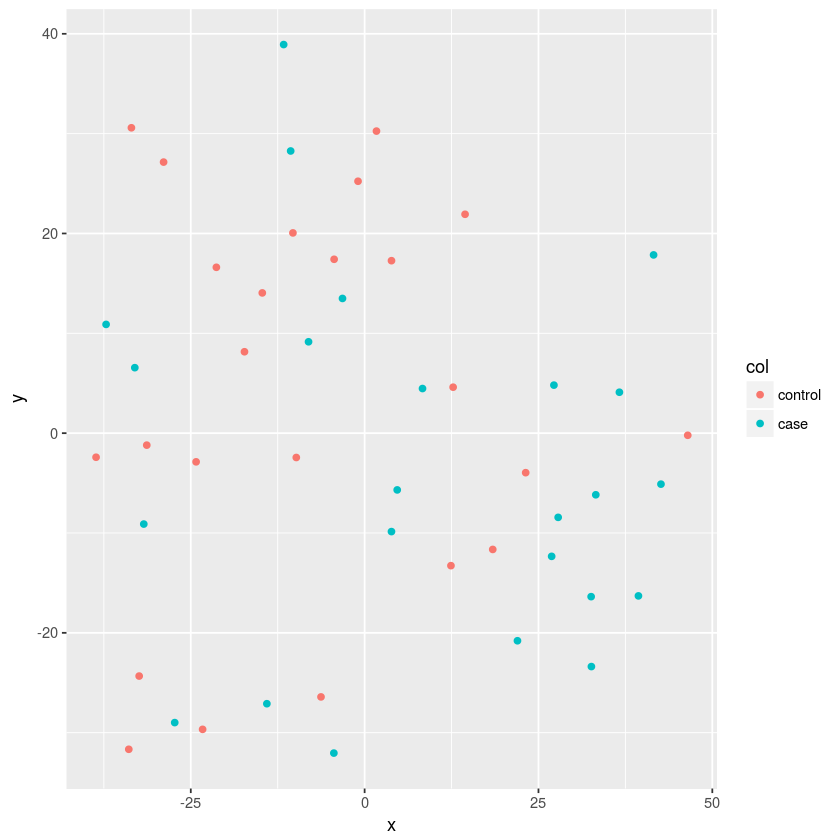

In [31]:
#install.packages("Rtsne")
library(Rtsne)
# tSNE for only 1000
 iris_matrix <- as.matrix(bbb[,o])
 set.seed(42) # Set a seed if you want reproducible results
 tsne_out <- Rtsne(iris_matrix,perplexity=4,max_iter = 1000) # Run TSNE

tsne_plot <- data.frame(x = tsne_out$Y[,1], y = tsne_out$Y[,2], col = bb$label)
ggplot(tsne_plot) + geom_point(aes(x=x, y=y, color=col))

# # Show the objects in the 2D tsne representation
 #plot(tsne_out$Y,col=iris_unique$Species)

In [32]:
#getwd()
#ls()
list.files(path = getwd())

[1] "2_chips_EPIC"                         
[2] "CHAMP_QCimages"                       
[3] "champ.SVD1.R"                         
[4] "EPIC_minifi.ipynb"                    
[5] "Methylation_EPIC_R01.ipynb"           
[6] "Methylation_Pipeline_GarmireLab.ipynb"
[7] "newplot.png"

# 5-Normalize the data
### There are four norlization methods:
### 1-SWAN method for M and B
### 2- PBC and BMIQ only need Beta

In [33]:
myNorm <- champ.norm(beta=myLoad_B$beta,
                    rgSet=myLoad_B$rgSet,
                    mset=myLoad_B$mset,
                    resultsDir="./CHAMP_Normalization/",
                    method="PBC",  #BMIQ
                    plotBMIQ=TRUE,
                    arraytype="EPIC",
                    cores=50)



[===========================]
[>>>>> ChAMP.NORM START <<<<<<]
-----------------------------
champ.norm Results will be saved in ./CHAMP_Normalization/
[ SWAN method call for BOTH rgSet and mset input, FunctionNormalization call for rgset only , while PBC and BMIQ only needs beta value. Please set parameter correctly. ]

<< Normalizing data with PBC Method >>


[1] "Done for sample 1"
[1] "Done for sample 2"
[1] "Done for sample 3"
[1] "Done for sample 4"
[1] "Done for sample 5"
[1] "Done for sample 6"
[1] "Done for sample 7"
[1] "Done for sample 8"
[1] "Done for sample 9"
[1] "Done for sample 10"
[1] "Done for sample 11"
[1] "Done for sample 12"
[1] "Done for sample 13"
[1] "Done for sample 14"
[1] "Done for sample 15"
[1] "Done for sample 16"
[1] "Done for sample 17"
[1] "Done for sample 18"
[1] "Done for sample 19"
[1] "Done for sample 20"
[1] "Done for sample 21"
[1] "Done for sample 22"
[1] "Done for sample 23"
[1] "Done for sample 24"
[1] "Done for sample 25"
[1] "Done for sample 26"
[1] "Done for sample 27"
[1] "Done for sample 28"
[1] "Done for sample 29"
[1] "Done for sample 30"
[1] "Done for sample 31"
[1] "Done for sample 32"
[1] "Done for sample 33"
[1] "Done for sample 34"
[1] "Done for sample 35"
[1] "Done for sample 36"
[1] "Done for sample 37"
[1] "Done for sample 38"
[1] "Done for sample 39"
[1] "Done for sample 40"
[1] "Done

[>>>>> ChAMP.NORM END <<<<<<]
[===========================]
[You may want to process champ.SVD() next.]



# 6-Batch effect detection
# How to detect batch effect?
### The singular value decomposition method (SVD) implemented by Teschendorff for methylation data is used to identify the most significant components of variation.  If it becomes clear from this SVD analysis that the largest components of variation are technical factors (batch effects) then it is worth considering the experimental design and implementing other normalization methods that may help remove technical variation. USING ComBat

In [35]:
#source('champ.SVD1.R')

[===========================]
[<<<<< ChAMP.SVD START >>>>>]
-----------------------------
champ.SVD Results will be saved in ./CHAMP_SVDimages/ .

[SVD analysis will be proceed with 728689 probes and 48 samples.]


[ champ.SVD() will only check the dimensions between data and pd, instead if checking if Sample_Names are correctly matched (because some user may have no Sample_Names in their pd file),thus please make sure your pd file is in accord with your data sets (beta) and (rgSet).]

<< Following Factors in your pd(sample_sheet.csv) will be analysised: >>
<Sample.ID>(factor):PL-22123, PL-21948, PL-21635, PL-20685, PL-16931, PL-16714, PL-16372, PL-15405, PL-15187, PL-15051, PL-13994, PL-13815, PL-13187, PL-12010, PL-11941, PL-8930, PL-8134, PL-1559, PL-794, PL-552, PL-1018, PL-838, PL-1448, PL-1530, PL-1558, PL-5476, PL-2108, PL-4829, PL-5717, PL-5110, PL-7317, PL-1623, PL-923, PL-1055, PL-1086, PL-1610, PL-2097, PL-2114, PL-2217, PL-2432, PL-2580, PL-2644, PL-2913, PL-3395, PL-3752, 

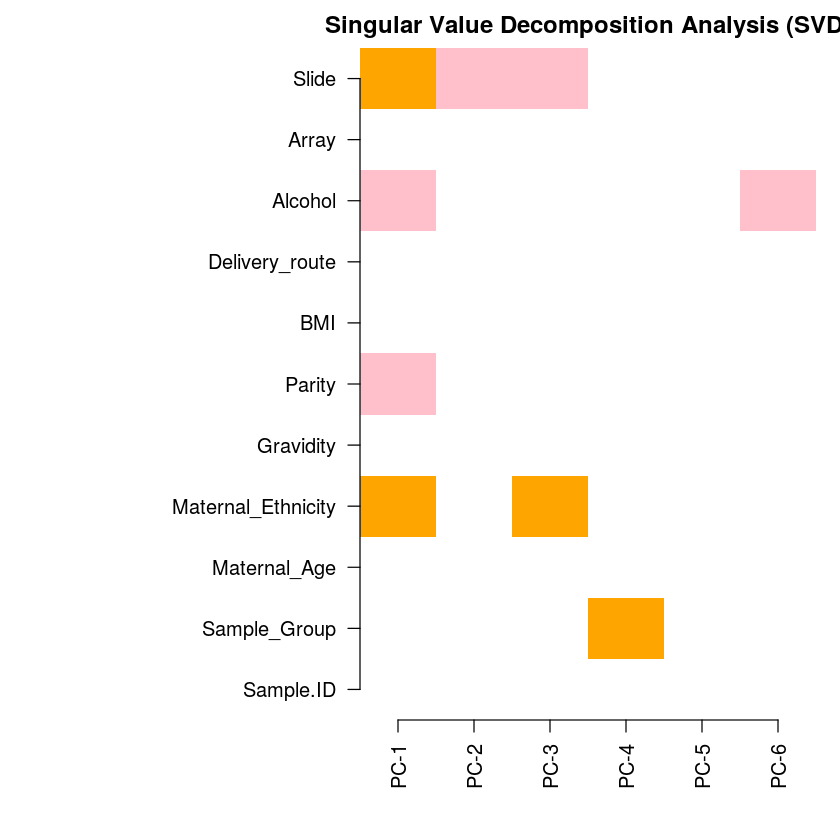

In [34]:
champ.SVD(beta = myNorm,
                   rgSet=myLoad_B$rgSet,
                   pd=myLoad_B$pd,
                   RGEffect=FALSE,
                   PDFplot=TRUE,
                   Rplot=TRUE,
                   resultsDir="./CHAMP_SVDimages/")


# 7-Batch effect removal if was detected

In [36]:
  myCombat <- champ.runCombat(beta=myNorm,
                         pd=myLoad_B$pd,
                         variablename="Sample_Group",
                         batchname=c("Slide"),
                         logitTrans=TRUE)


[===========================]
[<< CHAMP.RUNCOMBAT START >>]
-----------------------------
<< Preparing files for ComBat >>
[Combat correction will be proceed with 728689 probes and 48 samples.]

<< Following Factors in your pd(sample_sheet.csv) could be applied to Combat: >>
<Maternal_Ethnicity>(factor):Caucasian , Caucasian, Hawaiian, Asian
<Alcohol>(factor):No, Yes
<Array>(factor):R01C01, R02C01, R03C01, R04C01, R05C01, R06C01, R07C01, R08C01
<Slide>(factor):201516280050, 201516280051, 201516300004, 201516300006, 201516280049, 201516280027
[champ.runCombat have automatically select ALL factors contain at least two different values from your pd(sample_sheet.csv).]

<< Following Factors in your pd(sample_sheet.csv) can not be corrected: >>
<Sample.ID>
<Sample_Group>
<Maternal_Age>
<Gravidity>
<Parity>
<BMI>
<Delivery_route>
<Smoking>
<Basename>
<filenames>
[Factors are ignored because they are conflict with variablename, or they contain ONLY ONE value across all Samples, or some phenot

~Sample_Group
<environment: 0x21decc38>


Generate mod success. Started to run ComBat, which is quite slow...


Found 6 batches
Adjusting for 1 covariate(s) or covariate level(s)
Standardizing Data across genes
Fitting L/S model and finding priors
Finding parametric adjustments
Adjusting the Data


champ.runCombat success. Corrected dataset will be returned.


# 8-Check if the batch effect was removed

[===========================]
[<<<<< ChAMP.SVD START >>>>>]
-----------------------------
champ.SVD Results will be saved in ./CHAMP_SVDimages/ .

[SVD analysis will be proceed with 728689 probes and 48 samples.]


[ champ.SVD() will only check the dimensions between data and pd, instead if checking if Sample_Names are correctly matched (because some user may have no Sample_Names in their pd file),thus please make sure your pd file is in accord with your data sets (beta) and (rgSet).]

<< Following Factors in your pd(sample_sheet.csv) will be analysised: >>
<Sample_ID>(factor):PL-22123, PL-21948, PL-21635, PL-20685, PL-16931, PL-16714, PL-16372, PL-15405, PL-15187, PL-15051, PL-13994, PL-13815, PL-13187, PL-12010, PL-11941, PL-8930, PL-8134, PL-1559, PL-794, PL-552, PL-1018, PL-838, PL-1448, PL-1530, PL-1558, PL-5476, PL-2108, PL-4829, PL-5717, PL-5110, PL-7317, PL-1623, PL-923, PL-1055, PL-1086, PL-1610, PL-2097, PL-2114, PL-2217, PL-2432, PL-2580, PL-2644, PL-2913, PL-3395, PL-3752, 

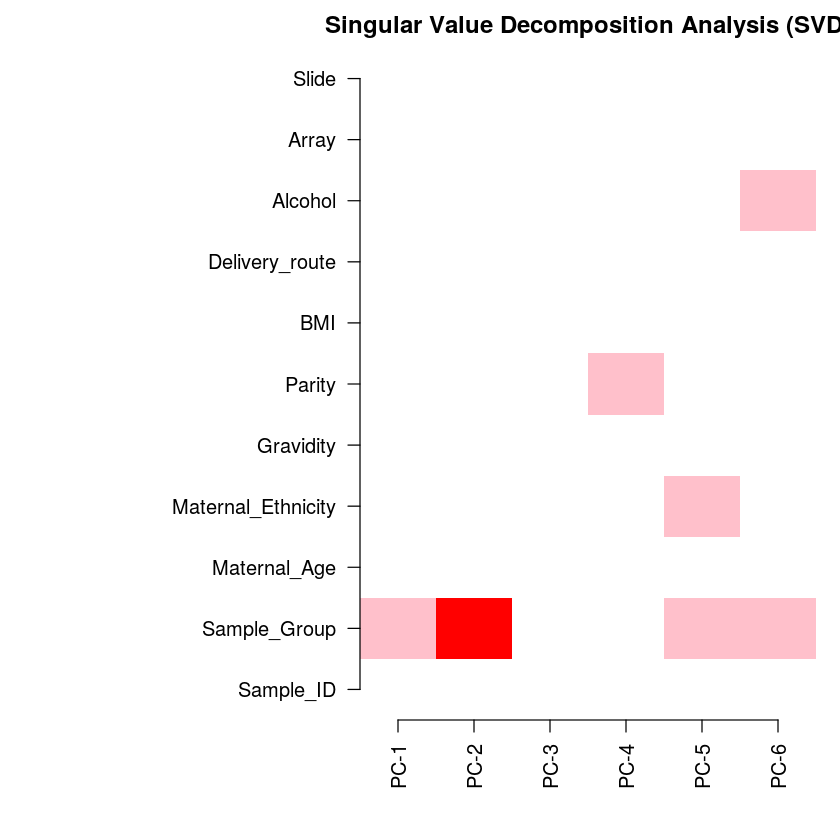

In [68]:
champ.SVD(beta = myCombat,
                   rgSet=myLoad_B$rgSet,
                   pd=myLoad_B$pd,
                   RGEffect=FALSE,
                   PDFplot=TRUE,
                   Rplot=TRUE,
                   resultsDir="./CHAMP_SVDimages/")

# 9-Differation Methyation Probs (DMP)detection

In [196]:
myDMP <- champ.DMP(beta = myNorm,pheno=myLoad_B$pd$Sample_Group,adjPVal = 0.05,
                   adjust.method = "BH",arraytype = "EPIC")
head(myDMP)

[===========================]
[<<<<< ChAMP.DMP START >>>>>]
-----------------------------
<< Your pheno information contains following groups. >>
<control>:24 samples.
<case>:24 samples.
[The power of statistics analysis on groups contain very few samples may not strong.]
You did not assign compare groups. The first two groups: <control> and <case>, will be compared automatically.

<< Contrast Matrix >>


          Contrasts
Levels     pcontrol-pcase
  pcase                -1
  pcontrol              1



<< All beta, pheno and model are prepared successfully. >>
You have found 676 significant MVPs with a BH adjusted P-value below 0.05.

<< Calculate DMP successfully. >>
[<<<<<< ChAMP.DMP END >>>>>>]
[===========================]
[You may want to process DMP.GUI() or champ.GSEA() next.]



,logFC,AveExpr,t,P.Value,adj.P.Val,B,control_AVG,case_AVG,deltaBeta,CHR,MAPINFO,Strand,Type,gene,feature,cgi,feat.cgi,UCSC_Islands_Name,SNP_ID,SNP_DISTANCE
cg12464154,0.11621180,0.2950656,7.177166,4.130831e-09,0.002955696,10.508522,0.3531715,0.2369597,-0.11621180,3,70588826,F,II,,IGR,opensea,IGR-opensea,,rs186405735,0
cg26746381,0.05477090,0.2190986,6.984937,8.112365e-09,0.002955696,9.840235,0.2464840,0.1917131,-0.05477090,6,116235476,R,II,,IGR,opensea,IGR-opensea,,rs530004909,22
cg17624661,0.11068052,0.4315172,6.719095,2.065884e-08,0.003763758,8.915390,0.4868574,0.3761769,-0.11068052,4,38531658,F,II,,IGR,opensea,IGR-opensea,,rs563420991,48
cg05780479,0.11397799,0.7526074,6.681354,2.359222e-08,0.003763758,8.784101,0.8095963,0.6956184,-0.11397799,10,24541465,F,II,KIAA1217,Body,opensea,Body-opensea,,rs551407736;rs571552650;rs530893735;rs549823491,0;20;39;48
cg22411949,0.08252066,0.1838052,6.655645,2.582555e-08,0.003763758,8.694677,0.2250655,0.1425449,-0.08252066,7,81090072,F,II,,IGR,opensea,IGR-opensea,,rs191955588;rs10274866;rs562648273;rs531485884,0;9;15;45
cg03540028,0.06974407,0.5372542,6.469976,4.962692e-08,0.006027098,8.049199,0.5721263,0.5023822,-0.06974407,21,43183977,F,II,RIPK4,Body,shelf,Body-shelf,chr21:43186280-43187436,rs71318592,40


# 10-Differation Methyation Regions (DMR)detection

In [194]:
myDMR <- champ.DMR(beta=myNorm,pheno=myLoad_B$pd$Sample_Group,
                   arraytype = "EPIC", method="Bumphunter",cores=10)
head(myDMR$BumphunterDMR)

[===========================]
[<<<<< ChAMP.DMR START >>>>>]
-----------------------------
Loading required package: IlluminaHumanMethylationEPICanno.ilm10b2.hg19
<< Find DMR with Bumphunter Method >>
10 cores will be used to do parallel BMIQ computing.
According to your data set, champ.DMR() detected 9189 clusters contains MORE THAN 7 probes within300 maxGap. These clusters will be used to find DMR.

[bumphunterEngine] Parallelizing using 10 workers/cores (backend: doParallelMC, version: 1.0.10).
[bumphunterEngine] Computing coefficients.
[bumphunterEngine] Smoothing coefficients.
Warning message:
"package 'doRNG' was built under R version 3.3.3"Loading required package: rngtools
Loading required package: pkgmaker
Loading required package: registry

Attaching package: 'pkgmaker'

The following object is masked from 'package:S4Vectors':

    new2

The following object is masked from 'package:base':

    isNamespaceLoaded

[bumphunterEngine] Performing 250 bootstraps.
[bumphunterEngine] 

,seqnames,start,end,width,strand,value,area,cluster,indexStart,indexEnd,L,clusterL,p.value,fwer,p.valueArea,fwerArea
DMR_1,chr10,118031632,118034031,2399,*,-0.4647032,12.546985,61977,13363,13389,27,27,0.0001332425,0.036,0.0007846505,0.184
DMR_2,chr15,40697568,40698392,824,*,0.9563612,11.476335,144437,33016,33027,12,14,0.0001628520,0.044,0.0012880111,0.268
DMR_3,chr6,30181529,30182518,989,*,-0.5287416,11.632315,367101,85414,85435,22,41,0.0002220709,0.060,0.0011991828,0.248
DMR_4,chr6,30226874,30228083,1209,*,-0.4547905,10.914972,367108,85436,85459,24,31,0.0002664851,0.068,0.0016433245,0.316
DMR_5,chr1,47696701,47698126,1425,*,-0.4645205,8.825889,15238,3422,3440,19,19,0.0005181654,0.132,0.0052408729,0.676
DMR_6,chr16,51184205,51185407,1202,*,-0.4113332,9.049331,166137,38640,38661,22,26,0.0006662127,0.140,0.0046338791,0.632


# 11-Block detection

# 12-GSEA

[1] 48  2

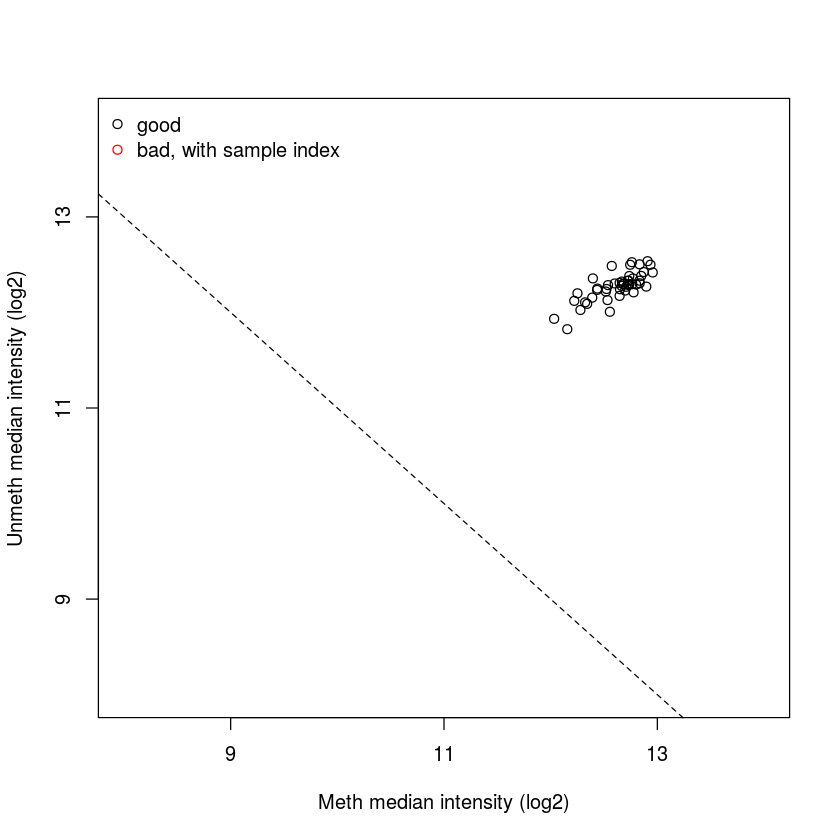

In [37]:
qc <- getQC(myLoad_B$mset)
dim(qc)
plotQC(qc)